<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 4</b></center>
<center><b><h1>¥@$# Kakadiya | 23010101121</b></center>
<pre>    

## Simple Linear Regression

## Step 1. Import the necessary libraries

In [1]:
import pandas as pd

## Step 2. Import the dataset

In [2]:
df = pd.read_csv("../data/raw/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 3 . Check the State Column

In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [6]:
df["State"].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

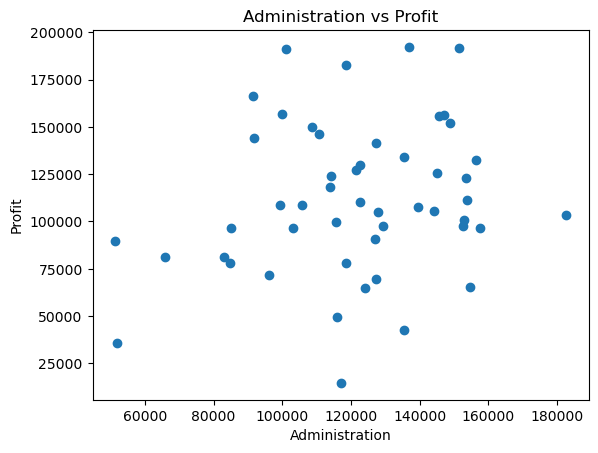

In [8]:
import matplotlib.pyplot as plt

plt.scatter(x=df["Administration"], y=df["Profit"])
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Administration vs Profit")
plt.show()

## Step 4 . Splitting dataset in to input and output

In [9]:
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [10]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida
5,131876.90,99814.71,362861.36,New York
6,134615.46,147198.87,127716.82,California
7,130298.13,145530.06,323876.68,Florida
8,120542.52,148718.95,311613.29,New York
9,123334.88,108679.17,304981.62,California


## Step 5 . Convert state Column into Numeric Column

## Step 5.1 .  Perform Transformation

In [11]:
X = pd.get_dummies(X, columns=["State"], prefix=["St"], dtype=bool, drop_first=True)

In [12]:
X

,R&D Spend,Administration,Marketing Spend,St_Florida,St_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


## Step 6 . Dummy variable trap

In [13]:
# Already Performed using | drop_first =True

# Already done above

## Step 7 Splitting dataset in to Train and Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

## Step 8  Import LinearRegression model from linear_model family 

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## Step 9  Fit the data

In [16]:
X_train_lr = model.fit(X_train, y_train)
X_train_lr

LinearRegression()

## Step 10  Predict the data

In [17]:
y_predict = X_train_lr.predict(X_test)
y_predict

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

## Step 11  Display Result

In [18]:
# y_test and y_predict
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
Name: Profit, dtype: float64

In [19]:
y_predict

array([126362.87908255,  84608.45383634,  99677.49425147,  46357.46068582,
       128750.48288504,  50912.4174188 , 109741.35032702, 100643.24281647,
        97599.27574594, 113097.42524432])

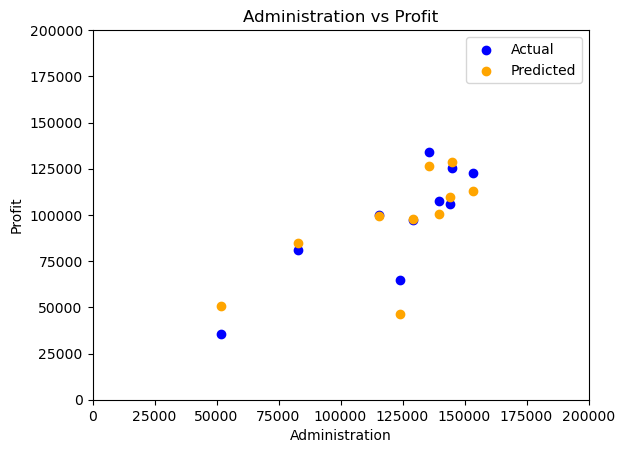

In [20]:
import matplotlib.pyplot as plt

plt.scatter(
    x=X_test["Administration"].values, y=y_test.values, color="blue", label="Actual"
)
plt.scatter(
    x=X_test["Administration"].values, y=y_predict, color="Orange", label="Predicted"
)
plt.xlim(0, 200000)
plt.ylim(0, 200000)
plt.legend()
plt.xlabel("Administration")
plt.ylabel("Profit")
plt.title("Administration vs Profit")
plt.show()

## RSS

In [21]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

Mean Squared Error: 82010363.04430102


## R Square

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_predict)
print("R-squared:", r2)

R-squared: 0.8987266414328637
